<a href="https://colab.research.google.com/github/MichalBerg99/MachineLearning/blob/main/ML_Suicide_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/suicide_data.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# Change names of the columns
df.columns=["country","year","gender","age_group","suicide_number","population","sui_pop","country_year","hdi","gdp_for_year","gdp_per_capita","generation"]

In [ ]:
df.drop(["country_year","gdp_for_year","generation","sui_pop"],axis=1,inplace=True)
df.head()

,country,year,gender,age_group,suicide_number,population,hdi,gdp_per_capita
0,Albania,1987,male,15-24 years,21,312900,NaN,796
1,Albania,1987,male,35-54 years,16,308000,NaN,796
2,Albania,1987,female,15-24 years,14,289700,NaN,796
3,Albania,1987,male,75+ years,1,21800,NaN,796
4,Albania,1987,male,25-34 years,9,274300,NaN,796


In [ ]:
df.age_group.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
df["age_group"].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [ ]:
df.describe()

,year,suicide_number,population,hdi,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,0.944000,126352.000000


In [ ]:
# Checks how many values are set to null, should be zero
df.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_number        0
population            0
hdi               19456
gdp_per_capita        0
dtype: int64

In [ ]:
# Sorts tabel by suicuide number and age group
df = df.sort_values(by=["suicide_number","age_group"], ascending=False)

df.head()

,country,year,gender,age_group,suicide_number,population,hdi,gdp_per_capita
20996,Russian Federation,1994,male,35-54 years,22338,19044200,NaN,2853
21008,Russian Federation,1995,male,35-54 years,21706,19249600,NaN,2844
21080,Russian Federation,2001,male,35-54 years,21262,21476420,NaN,2229
21068,Russian Federation,2000,male,35-54 years,21063,21378098,NaN,1879
21057,Russian Federation,1999,male,35-54 years,20705,21016400,NaN,1412


In [ ]:
# Resets index, giving us a descending order of max suicide to min suicide
df.reset_index(inplace=True,drop=True)
df.head()

,country,year,gender,age_group,suicide_number,population,hdi,gdp_per_capita
0,Russian Federation,1994,male,35-54 years,22338,19044200,NaN,2853
1,Russian Federation,1995,male,35-54 years,21706,19249600,NaN,2844
2,Russian Federation,2001,male,35-54 years,21262,21476420,NaN,2229
3,Russian Federation,2000,male,35-54 years,21063,21378098,NaN,1879
4,Russian Federation,1999,male,35-54 years,20705,21016400,NaN,1412


In [ ]:
df.corr()

,year,suicide_number,population,hdi,gdp_per_capita
year,1.000000,-0.004546,0.008850,0.366786,0.339134
suicide_number,-0.004546,1.000000,0.616162,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.102943,0.081510
hdi,0.366786,0.151399,0.102943,1.000000,0.771228
gdp_per_capita,0.339134,0.061330,0.081510,0.771228,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Converts string categorical variables into numerical variables
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

df = Encoder(df)

In [ ]:
df.head()

,country,year,gender,age_group,suicide_number,population,hdi,gdp_per_capita
0,75,1994,1,2,22338,19044200,NaN,2853
1,75,1995,1,2,21706,19249600,NaN,2844
2,75,2001,1,2,21262,21476420,NaN,2229
3,75,2000,1,2,21063,21378098,NaN,1879
4,75,1999,1,2,20705,21016400,NaN,1412


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Input data
X = df.drop(columns=['suicide_number'])

# Ouput data
y = df['suicide_number']

In [ ]:
# normalize the input features (attributes)
scalar = MinMaxScaler()
xn = scalar.fit_transform(X)
print('minmax scalar:\n', xn)


# Split data set into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
df.head()

minmax scalar:
 [[0.75       0.29032258 1.         ... 0.43474375        nan 0.02063425]
 [0.75       0.32258065 1.         ... 0.43943272        nan 0.02056288]
 [0.75       0.51612903 1.         ... 0.49026763        nan 0.01568584]
 ...
 [0.83       0.67741935 1.         ... 0.00988418        nan 0.1071522 ]
 [0.83       0.70967742 0.         ... 0.00931909        nan 0.13135502]
 [0.83       0.70967742 1.         ... 0.00971509        nan 0.13135502]]
22256
(22256, 7) (5564, 7)
(22256,) (5564,)


,country,year,gender,age_group,suicide_number,population,hdi,gdp_per_capita
0,75,1994,1,2,22338,19044200,NaN,2853
1,75,1995,1,2,21706,19249600,NaN,2844
2,75,2001,1,2,21262,21476420,NaN,2229
3,75,2000,1,2,21063,21378098,NaN,1879
4,75,1999,1,2,20705,21016400,NaN,1412


In [ ]:
import xgboost as xgb 

# Selects our model
model = xgb.XGBRegressor(seed=42, verbosity=1, objective='reg:squarederror')

# Training the model
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', seed=42)

In [ ]:
predictions = model.predict(X_test)

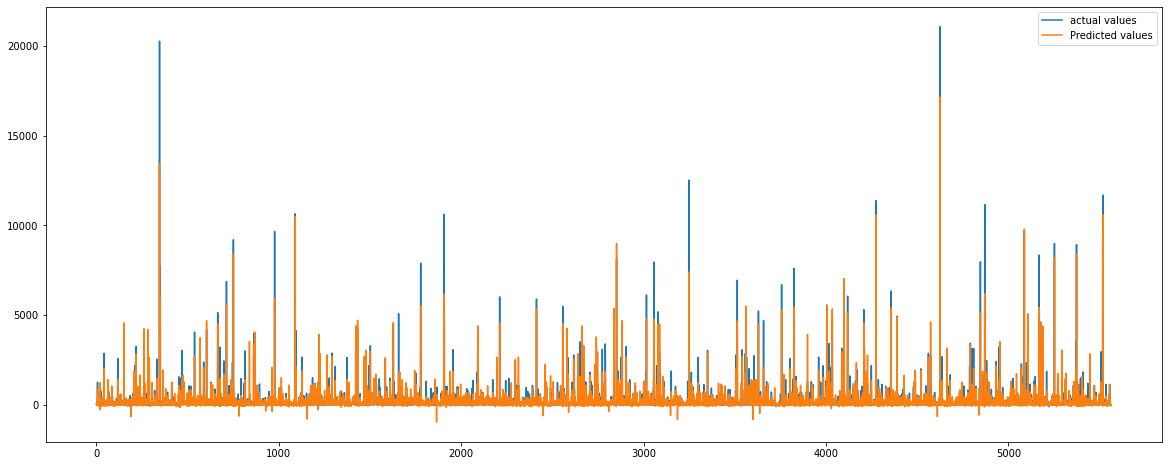

In [ ]:
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))], predictions, label="Predicted values")

# showing the plotting
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# Prints the MAE, MSE, RMSE and R2 score

def evaluate_regression(y, y_pred):
    
    mae = MAE(y, y_pred)
    mse = MSE(y, y_pred)
    rmse = mse ** (1/2)
    r2 = r2_score(y, y_pred)
    
    print('Regression result')
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R_squared: {r2:.5f}")

# Evaluates our regression model
evaluate_regression(y_test, predictions)

Regression result
MAE: 118.99
MSE: 109256.75
RMSE: 330.54
R_squared: 0.85438


In [ ]:
# pip install shap

In [ ]:
import shap

# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values
shap_values = explainer(X_test)

Exact explainer: 5565it [03:13, 27.07it/s]


In [ ]:
shap_values

.values =
array([[ 1.51874167e+01, -3.60917002e-01,  8.05498782e+01, ...,
        -3.90471882e+02,  3.08073077e+00,  2.75609829e+01],
       [ 1.67655224e+01,  1.95304804e+00,  8.16605009e+01, ...,
        -4.53160624e+02,  3.29835816e+00,  2.90643753e+01],
       [ 1.33855008e+00,  1.08300013e+00, -1.33799656e+02, ...,
        -1.11195390e+02, -2.49232445e+01,  3.11477702e+01],
       ...,
       [-5.78114498e+00, -1.74720779e+00,  8.84497819e+01, ...,
        -3.57908618e+02,  3.24668443e+00,  6.99012709e+01],
       [ 1.57027156e+01,  6.25119808e-01,  7.64863205e+01, ...,
        -3.05666681e+02,  2.91838024e+00, -1.03787838e+01],
       [ 2.19609924e+01,  1.14447631e+00, -1.04782908e+02, ...,
        -1.86432292e+02,  2.38187925e+00,  2.26811909e+01]])

.base_values =
array([309.63719294, 309.63719294, 309.63719294, ..., 309.63719294,
       309.63719294, 309.63719294])

.data =
array([[5.300000e+01, 2.007000e+03, 1.000000e+00, ..., 3.390100e+04,
                 nan, 1.125810e+05]

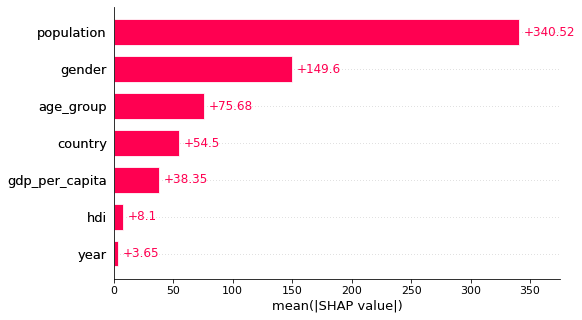

In [ ]:
shap.plots.bar(shap_values)

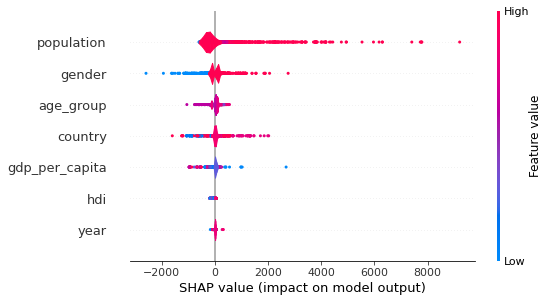

In [ ]:
# Violin plot of the SHAP values
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
ODI_runs = {'name': ['population', 'gender', 'age_group', 
                      'country', 'gdp_per_capita', 'hdi', 
                      'year'], 
            'weight': [340.52, 149.6, 75.68, 54.5, 38.35, 8.1, 3.65]} 
dg = pd.DataFrame(ODI_runs)  
  
# create a new column of percentile rank
dg['Percentile Rank'] = dg.weight.rank(pct = True)
  
# displaying the percentile rank
display(dg) 

,name,weight,Percentile Rank
0,population,340.52,1.000000
1,gender,149.60,0.857143
2,age_group,75.68,0.714286
3,country,54.50,0.571429
4,gdp_per_capita,38.35,0.428571
5,hdi,8.10,0.285714
6,year,3.65,0.142857


In [ ]:
# import module
import numpy as np

p_rank = [1, 0.857, 0.714, 0.571, 0.428, 0.285, 0.142]
weight = [340.52, 149.6, 75.68, 54.5, 38.35, 8.1, 3.65]


svi = 0;
for i in range(7):
  svi +=  p_rank[i] * weight[i];
print(svi/1000)

0.5731228199999999
